Saving image.jpg to image (4).jpg
Image Width: 512, Height: 512, Channels: 3
Number of contours detected: 39
Grayscale Image Mean: 131.0393829345703
Grayscale Image Std Dev: 79.44284914581905


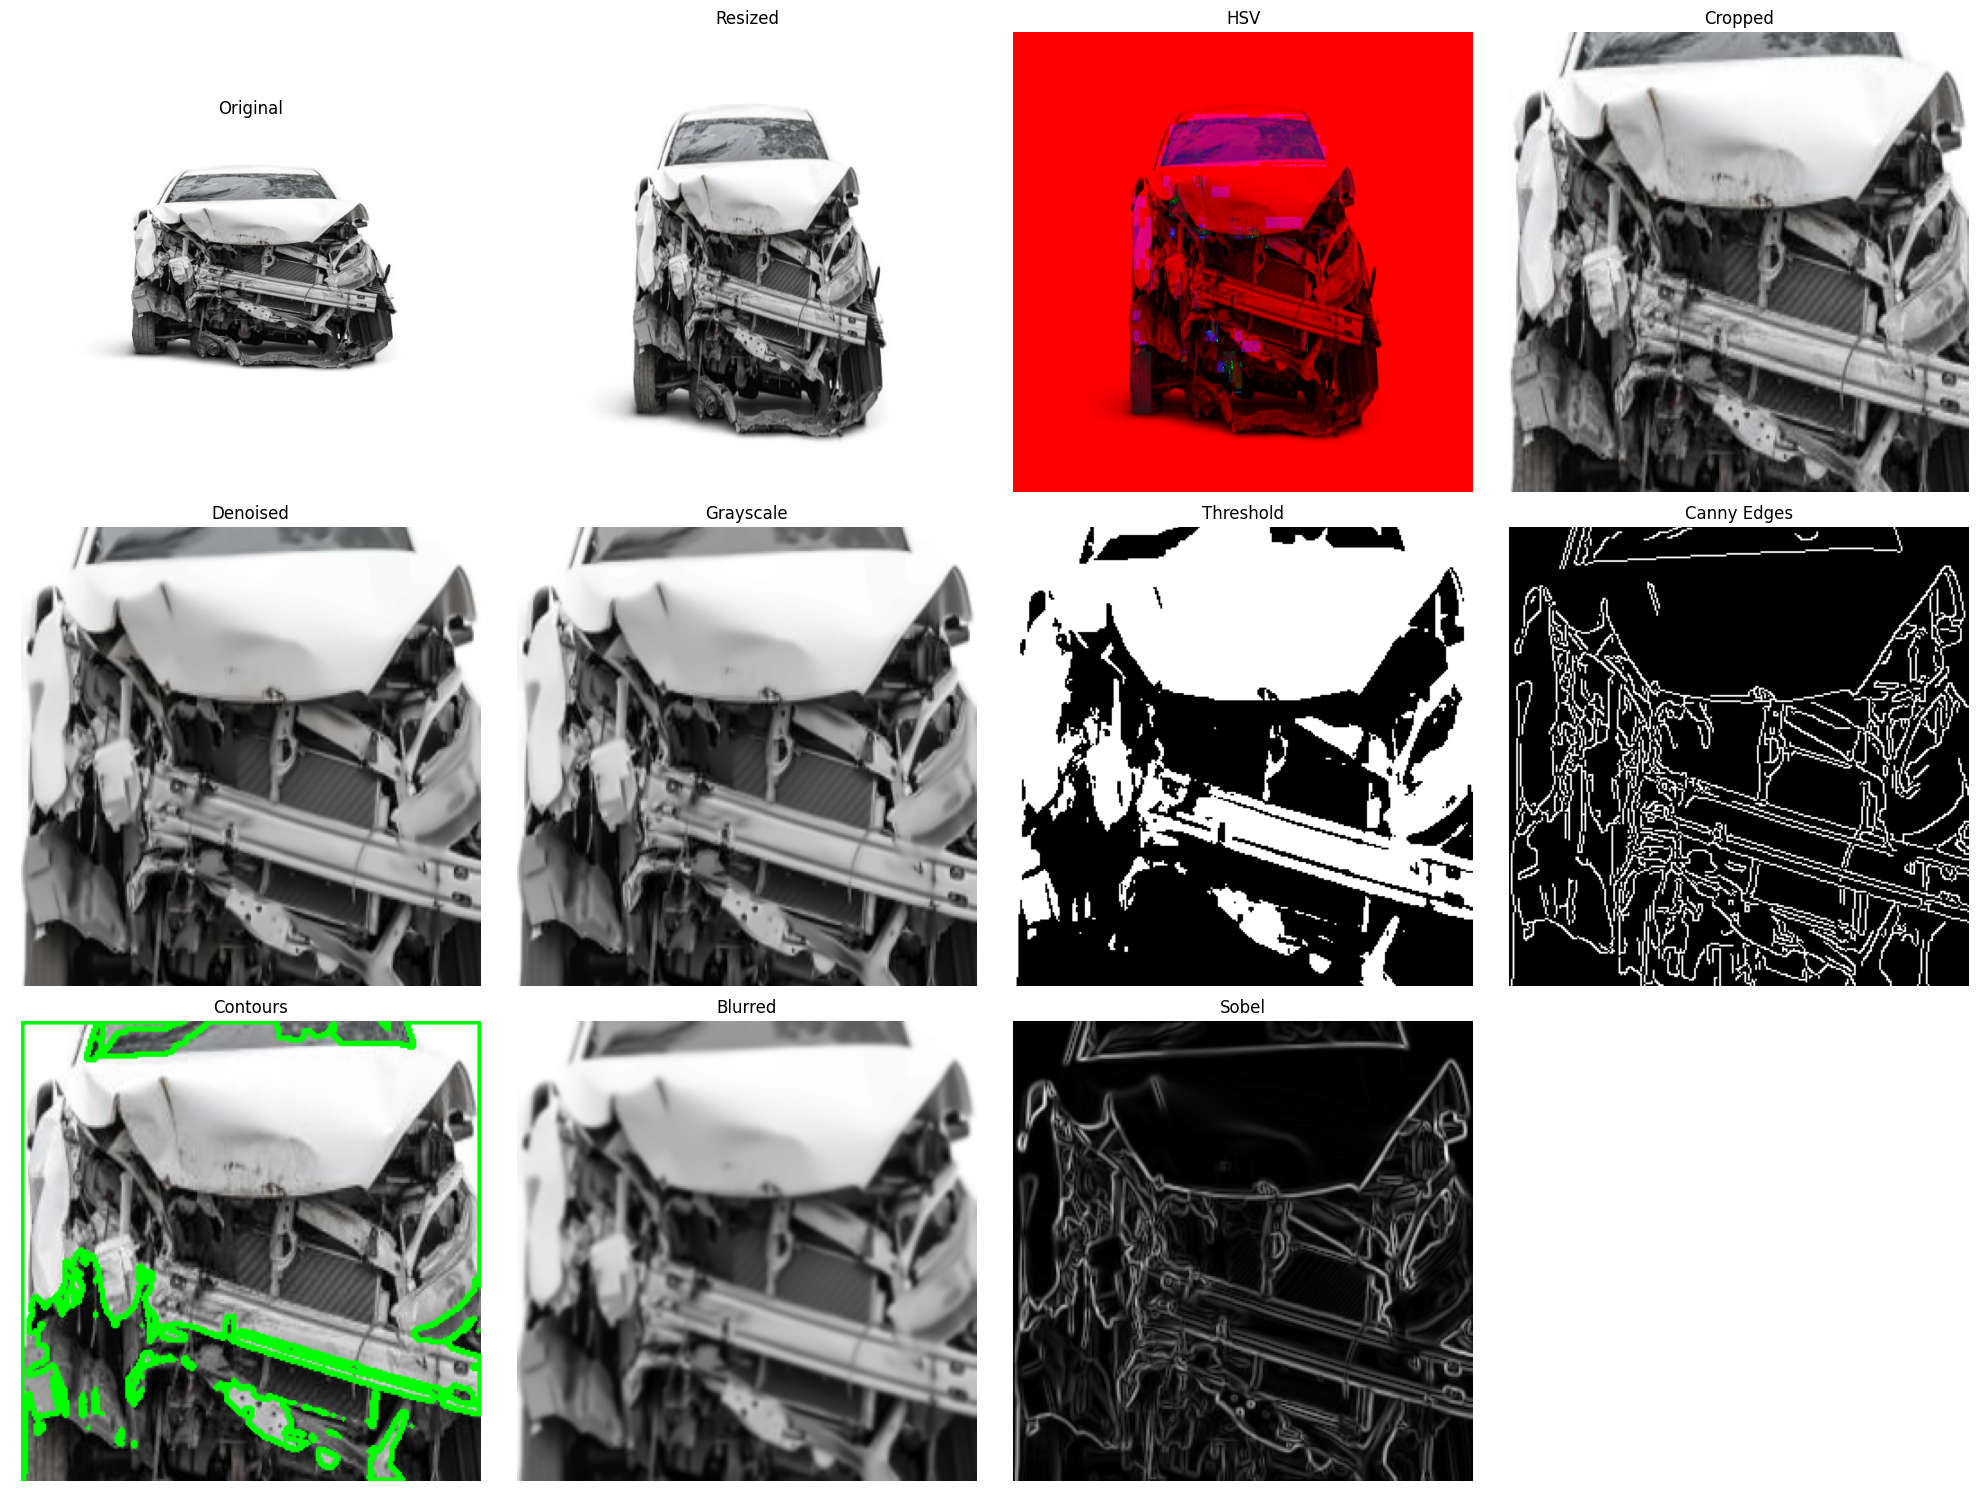

In [ ]:
# Step 1: Install Required Libraries
!pip install opencv-python-headless

# Step 2: Upload Image
from google.colab import files
uploaded = files.upload()

# Step 3: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 4: Load Image
file_name = next(iter(uploaded))
image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_COLOR)

# Step 5: Resize Image
resized = cv2.resize(image, (512, 512))

# Step 6: Get Height, Width, Channels
height, width, channels = resized.shape
print(f"Image Width: {width}, Height: {height}, Channels: {channels}")

# Step 7: HSV Conversion
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)

# Step 8: Cropped Image (center 256x256)
def crop_center(img, cropx=256, cropy=256):
    y, x = img.shape[:2]
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx]
cropped = crop_center(resized)

# Step 9: Noise Reduction
denoised = cv2.fastNlMeansDenoisingColored(cropped, None, 10, 10, 7, 21)

# Step 10: Grayscale Conversion
gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)

# Step 11: Thresholding
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Step 12: Canny Edge Detection
edges = cv2.Canny(gray, 100, 200)

# Step 13: Contour Detection
contour_img = cropped.copy()
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
print("Number of contours detected:", len(contours))

# Step 14: Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 15: Sobel Edge Detection
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

# Step 16: Basic EDA – Print Image Stats
print("Grayscale Image Mean:", np.mean(gray))
print("Grayscale Image Std Dev:", np.std(gray))

# Step 17: Display All Processed Images
titles = ['Original', 'Resized', 'HSV', 'Cropped', 'Denoised',
          'Grayscale', 'Threshold', 'Canny Edges', 'Contours', 'Blurred', 'Sobel']
images = [image, resized, hsv, cropped, denoised,
          gray, binary, edges, contour_img, blurred, sobel_combined]

plt.figure(figsize=(20, 15))
for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

